In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_complete = pd.read_csv("Scooter_df_HrsAndDays.csv")

In [11]:
print(len(data_complete))
data_complete.head()

381426


,Unnamed: 0,PollTime,CompanyName,NumberAvailable,Zipcode,Poverty Rate,Poverty Type,Hour,Day,Month
0,0,2019-05-18 11:00:00+00:00,Lime,1,55418.0,12.748436,High,6,18,5
1,1,2019-05-18 11:00:00+00:00,Lime,2,55418.0,12.748436,High,6,18,5
2,2,2019-05-18 11:00:00+00:00,Lime,1,55411.0,31.316104,Downtown,6,18,5
3,3,2019-05-18 11:00:00+00:00,Lime,3,55405.0,14.252629,Downtown,6,18,5
4,4,2019-05-18 11:00:00+00:00,Lime,1,55401.0,14.219141,Downtown,6,18,5


In [27]:
what_time = data_complete['Hour'] == 6

data_morning = data_complete[what_time]

p_type =  data_complete['Poverty Type'] == 'Low'
    
data_sub = data_morning[p_type]


print(len(data_sub))

data_sub.head()

5105


C:\Users\david\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Unnamed: 0,PollTime,CompanyName,NumberAvailable,Zipcode,Poverty Rate,Poverty Type,Hour,Day,Month
50,50,2019-05-18 11:00:00+00:00,Lime,2,55409.0,9.746556,Low,6,18,5
51,51,2019-05-18 11:00:00+00:00,Lime,3,55416.0,6.105558,Low,6,18,5
65,65,2019-05-18 11:00:00+00:00,Lime,1,55419.0,8.101071,Low,6,18,5
103,103,2019-05-18 11:00:00+00:00,Lime,1,55455.0,0.000000,Low,6,18,5
3049,3049,2019-05-19 11:00:00+00:00,Lime,2,55416.0,6.105558,Low,6,19,5


In [61]:
data_sub_gr = data_sub.groupby(["Month", "Day"])
data_morning_gr = data_morning.groupby(["Month", "Day"])

totals = data_sub_gr['NumberAvailable'].sum()

overall = data_morning_gr['NumberAvailable'].sum()

percent = (totals.values / overall.values)*100

#print(overall)
print(percent)
y_value = percent


x_ = 0
x_value = []

for i in range(len(y_value)):
    
    x_value.append(x_)
    x_ += 1
    


[ 1.4084507   2.14067278  2.31884058  1.79372197  1.6064257   1.2145749
  1.50214592  2.07792208  1.57480315  1.98019802  3.24543611  2.93609672
  2.64084507  3.25203252  3.58422939  2.17391304  2.42537313  1.54639175
  2.16718266  4.04721754  2.04081633  2.77777778  1.05421687  2.90620872
  1.82724252  2.11161388  1.92592593  4.33526012  1.19581465  2.39410681
  3.7037037   3.58166189  4.31654676  4.06626506  4.43285528  2.53623188
  2.36966825  5.26315789  2.78145695  3.71959943  5.3030303   3.44827586
  3.74639769  1.91082803  3.34728033  7.02426564  4.71204188  4.42477876
  4.52488688  3.55781449  3.71352785  6.09597925  5.2         3.21336761
  5.19348269  4.33862434  2.49500998  2.47831475  4.71910112  5.75692964
  2.85400659  5.81506196  3.55140187  1.74102285  2.31822972  3.95136778
  6.71506352  5.35987749  4.7826087   4.57142857  5.20628684  8.12928501
  8.83116883  8.72727273 15.6626506  14.82625483 13.41961853 12.71534044
 13.38582677 12.32665639 13.22147651 13.0106851  11.

In [62]:
data_morn_gr = data_morning.groupby(["Month", "Day"])


data_morn_gr.count()

Unnamed: 0  PollTime  CompanyName  NumberAvailable  Zipcode  \
Month Day                                                                
5     17          257       257          257              257      234   
      18          161       161          161              161      150   
      19          176       176          176              176      164   
      21          238       238          238              238      218   
      22          309       309          309              309      290   
...               ...       ...          ...              ...      ...   
9     23          764       764          764              764      706   
      24          769       769          769              769      710   
      25          825       825          825              825      742   
      26          790       790          790              790      723   
      27          773       773          773              773      718   

           Poverty Rate  Poverty Type  Hour  
Month Day                                    
5     17            233           234   257  
      18            150           150   161  
      19            164           164   176  
      21            218           218   238  
      22            289           290   309  
...                 ...           ...   ...  
9     23            704           706   764  
      24            709           710   769  
      25            741           742   825  
      26            723           723   790  
      27            718           718   773  

[133 rows x 8 columns]

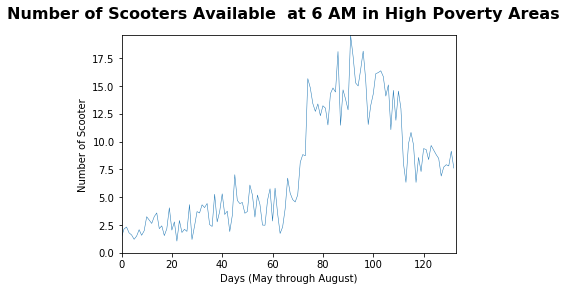

In [63]:
fig, ax = plt.subplots()

fig.suptitle("Number of Scooters Available  at 6 AM in High Poverty Areas", fontsize=16, fontweight="bold")

ax.set_xlim(0, len(totals))
ax.set_ylim(0, y_value.max())
ax.set_xlabel("Days (May through August)")
ax.set_ylabel("Number of Scooter")

ax.plot(x_value, y_value, linewidth=0.5)


plt.show()